Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Interships/Sample Datasets/Mall_Customers.csv')

In [ ]:
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Understanding the data**

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


head() shows first few rows of the dataset, if last rows needed then we can use 'dataset.tail()'

**Data exploration**-
1. summary statistics
2. missing/null values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


info() is used to display the brief information about the dataset showing if there is any null vale, datatypes, memory usage

In [ ]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Finds any null values. Using sum() displays total number of null values in the column

In [ ]:
dataset.shape

(200, 5)

shape is used for understanding the dimensions of rows and columns

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


display the statistical info of the dataset including mean, std, min, max, quartiles

Now, prepare the data for clustering, but how?

firstly sample extract for needed columns from the dataset

In [ ]:
x= dataset.iloc[:,[3,4]].values

dataframe from pandas that helps to retrieve the rows from the dataframe, iloc is used to extract the columns based on their index numbers. using .vales displays only the values as an array. {which is easier for plotting the clusters}

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Performing Elbow Method**, why?
to find the optimal k-value

why so?-

optimal k-value helps to balance the model complexity and accuracy, preventing overfitting and underfitting
[if k=2, it means 2 clusters]

what's that?

overfitting and underfitting are two common challenges in machine learning, where a model's performance is suboptimal.

Overfitting occurs when the model learns the training data too well, including the noise irrelivent details.

Underfitting occurs when the model is too simple and fails to capture the underlying pattern in the data, resulting in poor performance in both training and test data

In machine learning, training data is used to teach the model, while testing data is used to evaluate its performance on new, unseen data.

The training data is typically larger and used to adjust model parameters, while the testing data is used after the training is complete to assess the model's ability to generalize.

This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease in WCSS starts to slow down significantly. Elbow method is an unsupervised learning method to determine the optimal no. of clusters, one of the popular method to determine the optimal no. of k.

k-means clustering is the unsupervised learning algorithm that groups the unlabeled dataset into different clusters. Here, the letter **k** denotes the no. of predefined clusters that need to be created in the process.



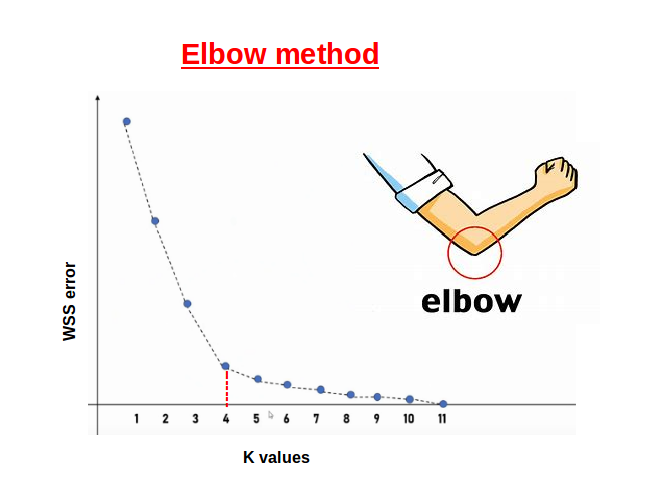

importing cluster from sklearn library

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for each value of k, wcss is calculated [within clusters sum of square]. WCSS is the sum of square distance between each point and the centroid in a cluster. When plot wcss with the k-value the plot looks like an elbow, as the no. of cluster increases wcss value will start to decrease. WCSS value is the largest when k=1.

In [ ]:
for i in range (1, 11):
  kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

this is used to iterate the kmeans algo for our data fro i iteration from 1 to 11 as we assume that maximum no. of cluster cannot be more than 10.

here we are using the **initializer [init] as 'k-means++'** this means kmeans algorithm ensures a smarter initialization of the centroids and improves the quality of clustering.

here **(kmeans.intertia_)** is a formula used to segregate the data points into clusters

In [ ]:
len(wcss)==len(range(1,11))

True

to check whether wcss=the range inserted

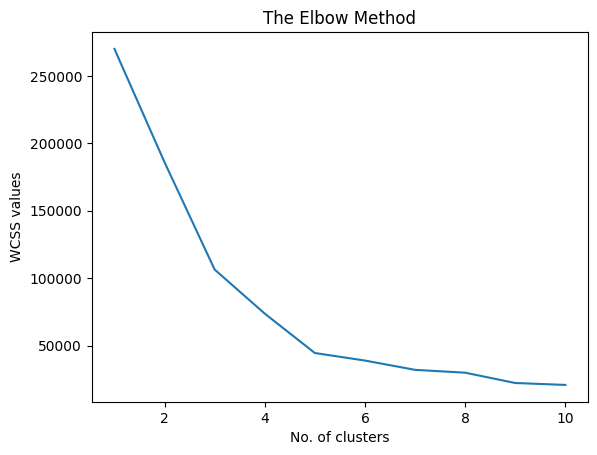

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

Now train a model using unsupervised learning algorithm [K-means]

In [ ]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

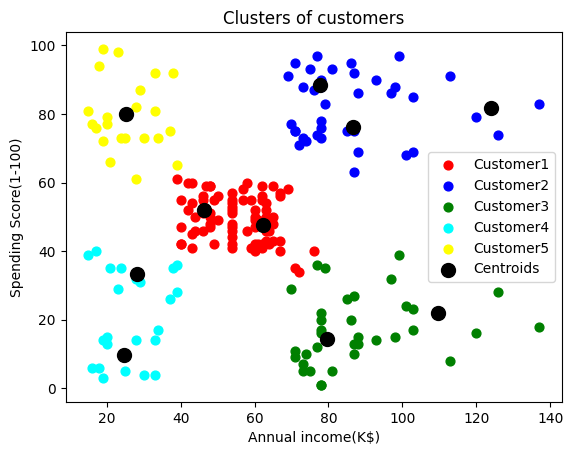

In [ ]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=40, c='red', label='Customer1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=40, c='blue', label='Customer2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=40, c='green', label='Customer3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=40, c='cyan', label='Customer4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=40, c='yellow', label='Customer5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

**Insights:**

Yellow cluster represents the cutomers with less salary but spending pattern is quite high, on the other hand Green cluster represents customer with high salary but low spending score.

The Red cluster will be the targeted customers by organization as it is a balance mix of decent annual income and well enough spending score. Businesses would target these customers to promote their services.